In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df =  pd.read_csv('data/cian_data_r_1_c_SPB.csv',index_col=0)
df

,id,time_post,time_parse,link,city,floor,floors_count,rooms_count,total_meters,price_per_m2,...,Высота потолков,Планировка,Санузел,Балкон/лоджия,Вид из окон,Ремонт,Год постройки,Тип дома,Аварийность,Парковка
0,295698515.0,28/11/2023 01:51,29/11/2023 02:43,https://spb.cian.ru/rent/flat/295698515/,Санкт-Петербург,25,25,1,39.0,897,...,2.7,NaN,1.0,1 лоджия,На улицу и двор,Косметический,2017.0,Панельный,Нет,Наземная
1,295698178.0,28/11/2023 01:40,04/12/2023 17:55,https://spb.cian.ru/rent/flat/295698178/,Санкт-Петербург,2,5,1,35.0,542,...,2.5,NaN,1.0,1 балкон,На улицу,Косметический,1979.0,Панельный,Нет,Наземная
2,295697184.0,28/11/2023 01:09,04/12/2023 11:04,https://spb.cian.ru/rent/flat/295697184/,Санкт-Петербург,9,9,1,32.4,617,...,2.6,NaN,1.0,NaN,NaN,Косметический,1981.0,Панельный,Нет,NaN
3,295695893.0,28/11/2023 00:46,28/11/2023 02:43,https://spb.cian.ru/rent/flat/295695893/,Санкт-Петербург,9,9,1,39.0,1282,...,2.6,NaN,1.0,NaN,NaN,Дизайнерский,2022.0,Монолитный,Нет,NaN
4,295695736.0,28/11/2023 00:38,04/12/2023 02:49,https://spb.cian.ru/rent/flat/295695736/,Санкт-Петербург,4,5,1,32.0,937,...,2.5,NaN,1.0,1 балкон,Во двор,Косметический,1962.0,Панельный,Нет,Наземная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,298412731.0,10/2/2024 15:31,22/02/2024 14:09,https://spb.cian.ru/rent/flat/298412731/,Санкт-Петербург,5,9,1,37.0,1432,...,2.6,NaN,1.0,NaN,Во двор,Косметический,2022.0,Монолитный,Нет,Многоуровневая
2766,298412317.0,18/2/2024 17:39,22/02/2024 14:10,https://spb.cian.ru/rent/flat/298412317/,Санкт-Петербург,6,12,1,34.0,1205,...,NaN,NaN,1.0,1 лоджия,Во двор,Евроремонт,2021.0,Монолитный,Нет,Открытая
2767,298411728.0,18/2/2024 14:01,22/02/2024 14:11,https://spb.cian.ru/rent/flat/298411728/,Санкт-Петербург,2,10,1,31.0,967,...,2.5,NaN,1.0,NaN,На улицу,Евроремонт,1974.0,Кирпичный,Нет,Наземная
2768,298411259.0,17/2/2024 15:52,22/02/2024 14:12,https://spb.cian.ru/rent/flat/298411259/,Санкт-Петербург,2,4,1,65.0,2307,...,3.3,NaN,2.0,NaN,На улицу и двор,Дизайнерский,2007.0,Монолитный,Нет,Подземная


In [3]:
df_utils = df[['Холодильник','Стиральная машина','Телевизор','Ванна','Мебель на кухне','Посудомоечная машина','Кондиционер','Интернет','Душевая кабина','Мебель в комнатах']]

In [4]:
df_utils_ = df_utils.replace(0,np.NaN)

In [5]:
df_utils_c = df_utils_.count().to_frame().reset_index()
df_utils_c.rename(columns={'index':'Удобства',0:'Количество'},inplace=True)
df_utils_c

,Удобства,Количество
0,Холодильник,2561
1,Стиральная машина,2541
2,Телевизор,1649
3,Ванна,1620
4,Мебель на кухне,2349
5,Посудомоечная машина,740
6,Кондиционер,223
7,Интернет,1934
8,Душевая кабина,435
9,Мебель в комнатах,2375


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


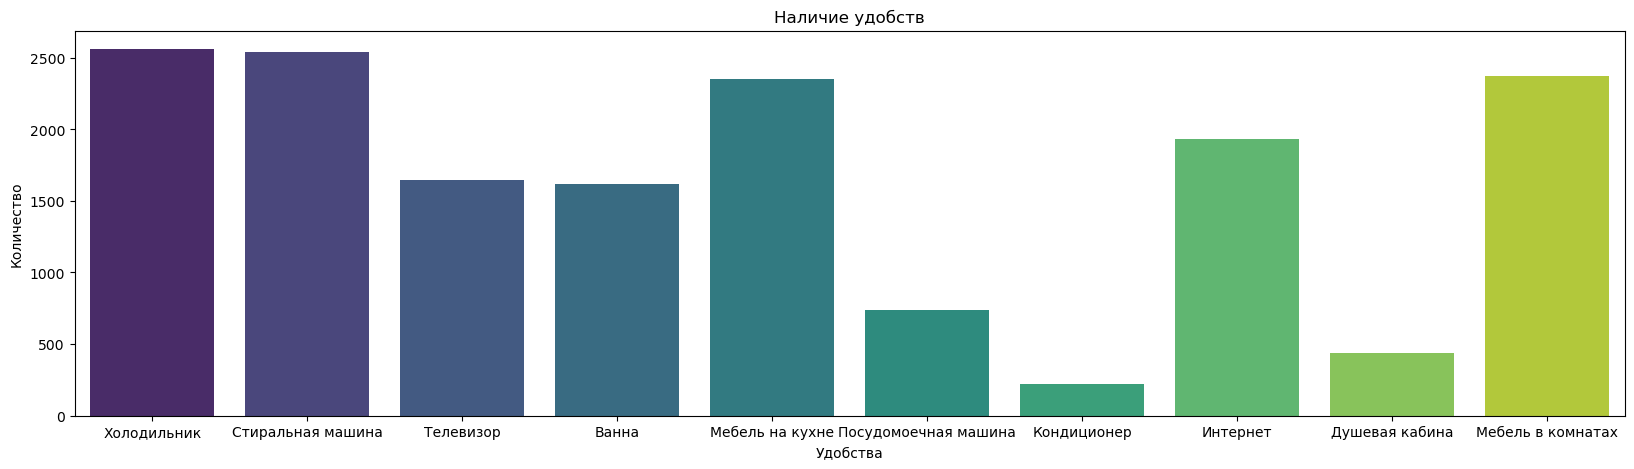

In [6]:
plt.figure(figsize=(20,5))
sns.barplot(data =df_utils_c,x='Удобства',y='Количество',palette='viridis')
plt.title('Наличие удобств')
plt.show()

In [7]:
df.loc[(df['Ванна'] == 0) & (df['Душевая кабина'] ==0),'link'].tail(30)

2646    https://spb.cian.ru/rent/flat/298792519/
2663    https://spb.cian.ru/rent/flat/298781896/
2665    https://spb.cian.ru/rent/flat/298781733/
2675    https://spb.cian.ru/rent/flat/298776148/
2676    https://spb.cian.ru/rent/flat/298775840/
2679    https://spb.cian.ru/rent/flat/298772834/
2682    https://spb.cian.ru/rent/flat/298772131/
2683    https://spb.cian.ru/rent/flat/298772043/
2688    https://spb.cian.ru/rent/flat/298767963/
2690    https://spb.cian.ru/rent/flat/298766475/
2691    https://spb.cian.ru/rent/flat/298754314/
2700    https://spb.cian.ru/rent/flat/298709270/
2702    https://spb.cian.ru/rent/flat/298705526/
2704    https://spb.cian.ru/rent/flat/298704567/
2707    https://spb.cian.ru/rent/flat/298684991/
2712    https://spb.cian.ru/rent/flat/298674750/
2713    https://spb.cian.ru/rent/flat/298671739/
2719    https://spb.cian.ru/rent/flat/298605185/
2724    https://spb.cian.ru/rent/flat/298561389/
2725    https://spb.cian.ru/rent/flat/298558979/
2740    https://spb.

'Ванна' и 'Душевая кабина' как правило не о чем не говрят, люди просто забывают их проставлять, поэтому удалим эти 2 столбца из данных

'Мебель на кухне' и 'Мебель в комнатах' тоже имеют мало общего с реальность, поэтому их тоже убираем

Однако, если убрать эти параметры невозможно определить квартиры без ремонта становится сильно сложнее, поэтому уберем их из анализа впринципе, удалив все квартиры в которых все удобства равны 0, и те в которых арендадатель честно поставил 'Без ремонта'

In [8]:
df_2 = df.drop(df[(df['Ванна'] == 0) & (df['Душевая кабина'] ==0) & (df['Холодильник'] ==0) & (df['Стиральная машина'] ==0) & (df['Телевизор'] ==0) & (df['Мебель на кухне'] ==0) & (df['Посудомоечная машина'] ==0) & (df['Кондиционер'] ==0) & (df['Интернет'] ==0) & (df['Мебель в комнатах'] ==0)].index)

In [9]:
len(df[(df['Ванна'] == 0) & (df['Душевая кабина'] ==0) & (df['Холодильник'] ==0) & (df['Стиральная машина'] ==0) & (df['Телевизор'] ==0) & (df['Мебель на кухне'] ==0) & (df['Посудомоечная машина'] ==0) & (df['Кондиционер'] ==0) & (df['Интернет'] ==0) & (df['Мебель в комнатах'] ==0)])

92

In [10]:
df_2.reset_index(drop=True,inplace=True)

Разбираемся с ремонтом

In [11]:
df_2['Ремонт'].value_counts()

Ремонт
Евроремонт       1254
Косметический     927
Дизайнерский      444
Без ремонта        16
Name: count, dtype: int64

In [12]:
df_2 = df_2.drop(df_2[df_2['Ремонт']== 'Без ремонта'].index)

Удалим планировку, так как этот параметр не имеет смысла для однакомнатных квартир

In [13]:
df_2 = df_2.drop('Планировка', axis = 1)

In [14]:
len_clear_old = len(df_2.dropna())

Так как аварийных домов в данных нет, но есть пустые значения, то удалим этот столбец

In [15]:
df_2['Аварийность'].value_counts()

Аварийность
Нет    2511
Name: count, dtype: int64

In [16]:
df_2 = df_2.drop('Аварийность',axis = 1)

Удаляем стобцы про ванну и мебель(объяснял зачем выше)

In [17]:
df_2 = df_2.drop(['Душевая кабина','Мебель в комнатах','Мебель на кухне','Ванна'], axis=1)

Удаляем квартиры без данных о адресе, так как он понадабится потом для взвешанной регрессии

In [18]:
df_2 = df_2.drop(df_2[df_2['house_number'].isnull()].index)
df_2 = df_2.drop(df_2[df_2['street'].isnull()].index)

Удаляем квартиры в которые не записалась инфа об удобствах по какой-то причине

In [19]:
df_2= df_2.drop(df_2[df_2['Холодильник'].isnull()].index)

Заполняем пустые поля 'метро'

In [20]:
df_2['underground']=df_2['underground'].fillna('нет метро')

In [21]:
df_2['Балкон/лоджия'].value_counts()

Балкон/лоджия
1 лоджия              1118
1 балкон               775
1 лоджия, 1 балкон      46
2 лоджии                12
2 балкона                5
Name: count, dtype: int64

In [22]:
df_2.loc[df_2['Балкон/лоджия'].isnull(),'link'].tail(20)

2594    https://spb.cian.ru/rent/flat/298770600/
2596    https://spb.cian.ru/rent/flat/298768713/
2605    https://spb.cian.ru/rent/flat/298726554/
2614    https://spb.cian.ru/rent/flat/298701150/
2618    https://spb.cian.ru/rent/flat/298683990/
2619    https://spb.cian.ru/rent/flat/298682219/
2622    https://spb.cian.ru/rent/flat/298671739/
2630    https://spb.cian.ru/rent/flat/298573109/
2632    https://spb.cian.ru/rent/flat/298561389/
2633    https://spb.cian.ru/rent/flat/298558979/
2637    https://spb.cian.ru/rent/flat/298531322/
2646    https://spb.cian.ru/rent/flat/298438144/
2648    https://spb.cian.ru/rent/flat/298430147/
2649    https://spb.cian.ru/rent/flat/298427461/
2663    https://spb.cian.ru/rent/flat/298415804/
2666    https://spb.cian.ru/rent/flat/298414665/
2669    https://spb.cian.ru/rent/flat/298413519/
2672    https://spb.cian.ru/rent/flat/298412731/
2674    https://spb.cian.ru/rent/flat/298411728/
2675    https://spb.cian.ru/rent/flat/298411259/
Name: link, dtype: o

Если инфы о балконе нет - значит балкона нет. Заполним пустые строки

In [23]:
df_2['Балкон/лоджия']=df_2['Балкон/лоджия'].fillna('нет балкона')

Посмотрим на высоту потолков

In [24]:
df_2['Высота потолков'].value_counts()

Высота потолков
2.7    618
2.6    326
2.5    326
2.8    198
3.0     96
3.2     22
2.9     19
0.0     18
3.1     10
3.3      9
2.4      6
3.5      6
3.4      5
4.0      4
2.0      3
3.6      3
3.8      2
4.2      2
1.5      1
2.3      1
4.1      1
5.0      1
Name: count, dtype: int64

In [25]:
df_2.loc[df_2['Высота потолков'] == 0,'link']

25      https://spb.cian.ru/rent/flat/295687308/
69      https://spb.cian.ru/rent/flat/295727467/
203     https://spb.cian.ru/rent/flat/295853519/
271     https://spb.cian.ru/rent/flat/295806798/
330     https://spb.cian.ru/rent/flat/295773962/
614     https://spb.cian.ru/rent/flat/295336027/
817     https://spb.cian.ru/rent/flat/295006005/
1420    https://spb.cian.ru/rent/flat/295773974/
1435    https://spb.cian.ru/rent/flat/295286509/
1668    https://spb.cian.ru/rent/flat/297788083/
1921    https://spb.cian.ru/rent/flat/298754329/
2093    https://spb.cian.ru/rent/flat/298682386/
2286    https://spb.cian.ru/rent/flat/298530195/
2315    https://spb.cian.ru/rent/flat/298495638/
2394    https://spb.cian.ru/rent/flat/298855045/
2545    https://spb.cian.ru/rent/flat/298796050/
2546    https://spb.cian.ru/rent/flat/298796007/
2600    https://spb.cian.ru/rent/flat/298754314/
Name: link, dtype: object

Люди случайно ставят 0 в высоту потолков. Заменим нули и пустые значения средним

In [26]:
cellig_mean = df_2['Высота потолков'].mean()
cellig_mean

2.6677996422182466

In [27]:
df_2['Высота потолков'] = df_2['Высота потолков'].replace(0,cellig_mean)
df_2['Высота потолков'] = df_2['Высота потолков'].fillna(cellig_mean)

Разбираемся с площадью

In [28]:
print('С жил. площадью: {}'.format(df_2['Жилая площадь'].count()))
print('С площадью кухни: {}'.format(df_2['Площадь кухни'].count()))
print('Всего: {}'.format(len(df_2)))

С жил. площадью: 2172
С площадью кухни: 2307
Всего: 2644


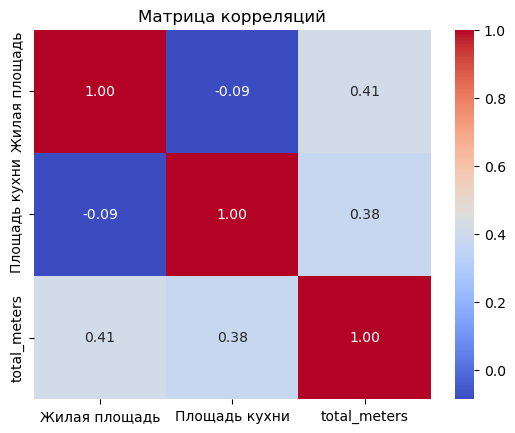

In [29]:
df_area = df_2[['Жилая площадь','Площадь кухни','total_meters']]
df_area = df_area.dropna()
area_corr = df_area.corr()
sns.heatmap(area_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Вообще корреляции не большие, поэтому не то чтобы хорошо удалять жилплощадь, но пока данных мало, чтобы еще сильнее не уменьшать их количство за счет удаления квартир, где жилплощадь не указана, я считаю, что следует удалить

In [30]:
df_2 = df_2.drop('Жилая площадь',axis = 1)

Разбираемся с парковкой

In [31]:
df_2['Парковка'].value_counts()

Парковка
Наземная          1035
Открытая           301
Подземная          259
Многоуровневая      87
Name: count, dtype: int64

In [32]:
df_2.loc[df_2['Парковка'] =='Наземная','link'].tail(5)

2658    https://spb.cian.ru/rent/flat/298419164/
2659    https://spb.cian.ru/rent/flat/298419115/
2661    https://spb.cian.ru/rent/flat/298417365/
2665    https://spb.cian.ru/rent/flat/298415670/
2674    https://spb.cian.ru/rent/flat/298411728/
Name: link, dtype: object

In [33]:
df_2.loc[df_2['Парковка'].isnull(),'link'].tail(5)

2649    https://spb.cian.ru/rent/flat/298427461/
2656    https://spb.cian.ru/rent/flat/298421113/
2662    https://spb.cian.ru/rent/flat/298416780/
2667    https://spb.cian.ru/rent/flat/298414407/
2669    https://spb.cian.ru/rent/flat/298413519/
Name: link, dtype: object

Заполним пустые значения 'наземной' парковкой, конечно это не будет идельно отражать ситуацию, так как в некоторых домах в центре парковочных места почти нет, но во многих домах со значением 'наземная' места не всегда больше.

In [34]:
df_2['Парковка']=df_2['Парковка'].fillna('Наземная')

Разберемся с санузлами

In [35]:
df_2.loc[df_2['Санузел'].isna(),'link']

5       https://spb.cian.ru/rent/flat/295693511/
8       https://spb.cian.ru/rent/flat/295692227/
10      https://spb.cian.ru/rent/flat/295691410/
19      https://spb.cian.ru/rent/flat/295688083/
20      https://spb.cian.ru/rent/flat/295688081/
                          ...                   
2591    https://spb.cian.ru/rent/flat/298772131/
2632    https://spb.cian.ru/rent/flat/298561389/
2647    https://spb.cian.ru/rent/flat/298430937/
2648    https://spb.cian.ru/rent/flat/298430147/
2667    https://spb.cian.ru/rent/flat/298414407/
Name: link, Length: 287, dtype: object

In [36]:
df_2['Санузел'].value_counts()

Санузел
1.0    2333
2.0      24
Name: count, dtype: int64

Так как мы рассматриваем квартиры, а не команты, то квартира без санузла это что-то на грани фантастики, а 2 санузла - явное приемущство, так что предположим, что арендадатели действуют рационально и пишут об этом приемуществе, и заполним все пустые значения единичками

In [37]:
df_2['Санузел']=df_2['Санузел'].fillna(1.0)

In [38]:
df_2.count().sort_values()

Вид из окон             2082
Тип дома                2087
Площадь кухни           2307
Год постройки           2503
Ремонт                  2618
id                      2644
Балкон/лоджия           2644
Санузел                 2644
Высота потолков         2644
Интернет                2644
Кондиционер             2644
Посудомоечная машина    2644
Телевизор               2644
Стиральная машина       2644
Холодильник             2644
underground             2644
street                  2644
district                2644
price_per_month         2644
price_per_m2            2644
total_meters            2644
rooms_count             2644
floors_count            2644
floor                   2644
city                    2644
link                    2644
time_parse              2644
time_post               2644
house_number            2644
Парковка                2644
dtype: int64

In [39]:
len_clear_old

528

In [40]:
len(df_2.dropna())

1368

Итого удалось увеличть число отчищенных данных более чем в 2 раза

In [41]:
df_2.columns

Index(['id', 'time_post', 'time_parse', 'link', 'city', 'floor',
       'floors_count', 'rooms_count', 'total_meters', 'price_per_m2',
       'price_per_month', 'district', 'street', 'house_number', 'underground',
       'Холодильник', 'Стиральная машина', 'Телевизор', 'Посудомоечная машина',
       'Кондиционер', 'Интернет', 'Площадь кухни', 'Высота потолков',
       'Санузел', 'Балкон/лоджия', 'Вид из окон', 'Ремонт', 'Год постройки',
       'Тип дома', 'Парковка'],
      dtype='object')

удалим все ненужные колонки, включая адреса пока-что

In [42]:
df_2 = df_2.dropna()

In [43]:
ds = df_2.drop(['link','city','price_per_m2','street','house_number','rooms_count'], axis = 1)

In [44]:
ds.reset_index(drop = True, inplace = True)

In [45]:
ds

,id,time_post,time_parse,floor,floors_count,total_meters,price_per_month,district,underground,Холодильник,...,Интернет,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,Вид из окон,Ремонт,Год постройки,Тип дома,Парковка
0,295698515.0,28/11/2023 01:51,29/11/2023 02:43,25,25,39.0,35000,Фрунзенский,Проспект Славы,1.0,...,1.0,12.0,2.7000,1.0,1 лоджия,На улицу и двор,Косметический,2017.0,Панельный,Наземная
1,295698178.0,28/11/2023 01:40,04/12/2023 17:55,2,5,35.0,19000,Невский,Ломоносовская,1.0,...,1.0,7.0,2.5000,1.0,1 балкон,На улицу,Косметический,1979.0,Панельный,Наземная
2,295695736.0,28/11/2023 00:38,04/12/2023 02:49,4,5,32.0,30000,Приморский,Пионерская,1.0,...,1.0,4.7,2.5000,1.0,1 балкон,Во двор,Косметический,1962.0,Панельный,Наземная
3,295693511.0,27/11/2023 23:23,03/12/2023 13:39,6,17,42.0,20000,Красногвардейский,Улица Дыбенко,1.0,...,1.0,10.0,2.7000,1.0,нет балкона,Во двор,Косметический,1982.0,Панельный,Наземная
4,295692993.0,27/11/2023 22:59,29/11/2023 02:43,4,5,36.0,30000,Приморский,Черная речка,1.0,...,0.0,6.5,2.6678,1.0,1 балкон,На улицу,Косметический,1962.0,Кирпичный,Наземная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,298413282.0,22/02/2024 14:00,22/02/2024 14:07,1,8,50.0,90000,Петроградский,Крестовский остров,1.0,...,1.0,16.0,2.6678,1.0,1 лоджия,Во двор,Евроремонт,2019.0,Монолитный,Многоуровневая
1364,298412829.0,18/2/2024 21:36,22/02/2024 14:08,7,14,37.8,62000,Приморский,Черная речка,1.0,...,1.0,11.3,2.7000,1.0,1 лоджия,На улицу,Дизайнерский,2022.0,Монолитный,Подземная
1365,298412731.0,10/2/2024 15:31,22/02/2024 14:09,5,9,37.0,53000,Выборгский,Лесная,1.0,...,0.0,18.0,2.6000,1.0,нет балкона,Во двор,Косметический,2022.0,Монолитный,Многоуровневая
1366,298411728.0,18/2/2024 14:01,22/02/2024 14:11,2,10,31.0,30000,Калининский,Выборгская,1.0,...,1.0,8.0,2.5000,1.0,нет балкона,На улицу,Евроремонт,1974.0,Кирпичный,Наземная


In [46]:
from datetime import datetime,timedelta

In [47]:
def time_diff(post,parse):
    t1 = datetime.strptime(post,'%d/%m/%Y %H:%M')
    t2 = datetime.strptime(parse,'%d/%m/%Y %H:%M')
    time_to_rent = t2 - t1
    time_to_rent = round(time_to_rent.total_seconds()/60/60/24)
    return time_to_rent

In [48]:
ds = ds.drop(ds[ds['time_post'] == '1 дек  18:21'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  13:53'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  14:54'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  13:20'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  00:14'].index)
ds = ds.drop(ds[ds['time_post'] == '1 дек  10:36'].index)

In [49]:
ds['time_to_rent'] = ds.apply(lambda x: time_diff(x.time_post,x.time_parse), axis = 1)

In [50]:
ds

,id,time_post,time_parse,floor,floors_count,total_meters,price_per_month,district,underground,Холодильник,...,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,Вид из окон,Ремонт,Год постройки,Тип дома,Парковка,time_to_rent
0,295698515.0,28/11/2023 01:51,29/11/2023 02:43,25,25,39.0,35000,Фрунзенский,Проспект Славы,1.0,...,12.0,2.7000,1.0,1 лоджия,На улицу и двор,Косметический,2017.0,Панельный,Наземная,1
1,295698178.0,28/11/2023 01:40,04/12/2023 17:55,2,5,35.0,19000,Невский,Ломоносовская,1.0,...,7.0,2.5000,1.0,1 балкон,На улицу,Косметический,1979.0,Панельный,Наземная,7
2,295695736.0,28/11/2023 00:38,04/12/2023 02:49,4,5,32.0,30000,Приморский,Пионерская,1.0,...,4.7,2.5000,1.0,1 балкон,Во двор,Косметический,1962.0,Панельный,Наземная,6
3,295693511.0,27/11/2023 23:23,03/12/2023 13:39,6,17,42.0,20000,Красногвардейский,Улица Дыбенко,1.0,...,10.0,2.7000,1.0,нет балкона,Во двор,Косметический,1982.0,Панельный,Наземная,6
4,295692993.0,27/11/2023 22:59,29/11/2023 02:43,4,5,36.0,30000,Приморский,Черная речка,1.0,...,6.5,2.6678,1.0,1 балкон,На улицу,Косметический,1962.0,Кирпичный,Наземная,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,298413282.0,22/02/2024 14:00,22/02/2024 14:07,1,8,50.0,90000,Петроградский,Крестовский остров,1.0,...,16.0,2.6678,1.0,1 лоджия,Во двор,Евроремонт,2019.0,Монолитный,Многоуровневая,0
1364,298412829.0,18/2/2024 21:36,22/02/2024 14:08,7,14,37.8,62000,Приморский,Черная речка,1.0,...,11.3,2.7000,1.0,1 лоджия,На улицу,Дизайнерский,2022.0,Монолитный,Подземная,4
1365,298412731.0,10/2/2024 15:31,22/02/2024 14:09,5,9,37.0,53000,Выборгский,Лесная,1.0,...,18.0,2.6000,1.0,нет балкона,Во двор,Косметический,2022.0,Монолитный,Многоуровневая,12
1366,298411728.0,18/2/2024 14:01,22/02/2024 14:11,2,10,31.0,30000,Калининский,Выборгская,1.0,...,8.0,2.5000,1.0,нет балкона,На улицу,Евроремонт,1974.0,Кирпичный,Наземная,4


In [51]:
ds = ds.drop(['id','time_post','time_parse'],axis = 1)

In [52]:
ds = ds.drop(ds[ds['district']=='Однушка в Приморском е1-комн. квартира'].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


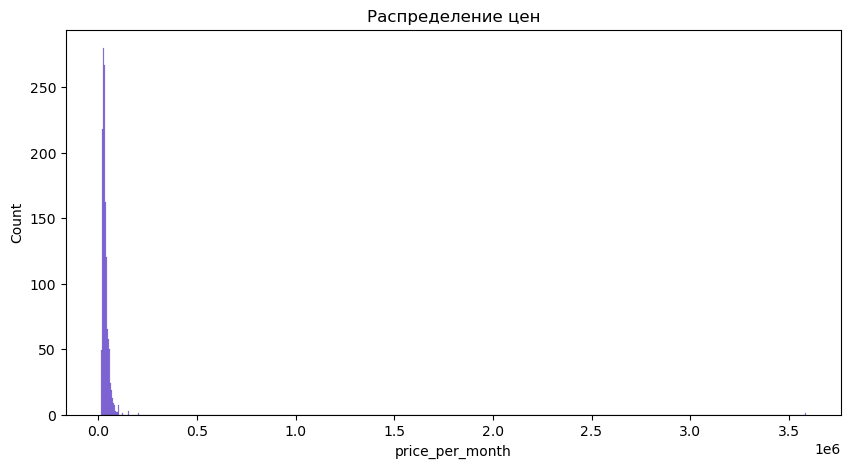

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'price_per_month',color = (114/255, 76/255, 249/255),data = ds,binwidth=5000)
plt.title('Распределение цен')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


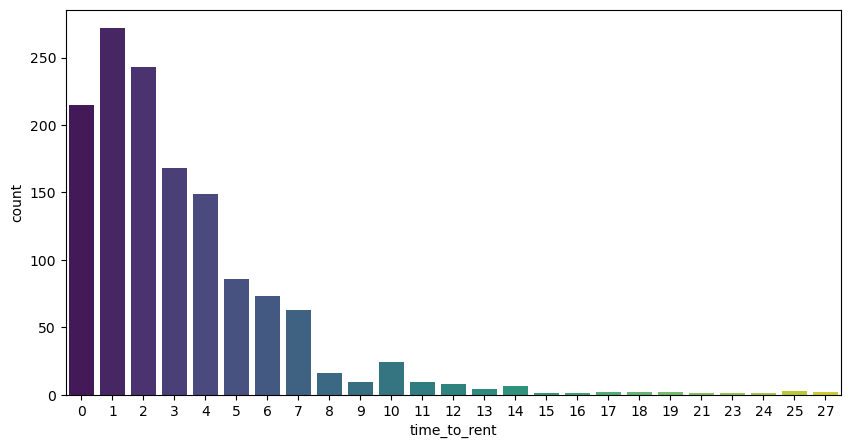

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'time_to_rent',palette='viridis',data = ds)
plt.show()

удалим выбросы через 3-сигмы

In [55]:
ds = ds.drop(ds[np.abs(stats.zscore(ds['price_per_month']))>3].index)
ds = ds.drop(ds[np.abs(stats.zscore(ds['time_to_rent']))>3].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


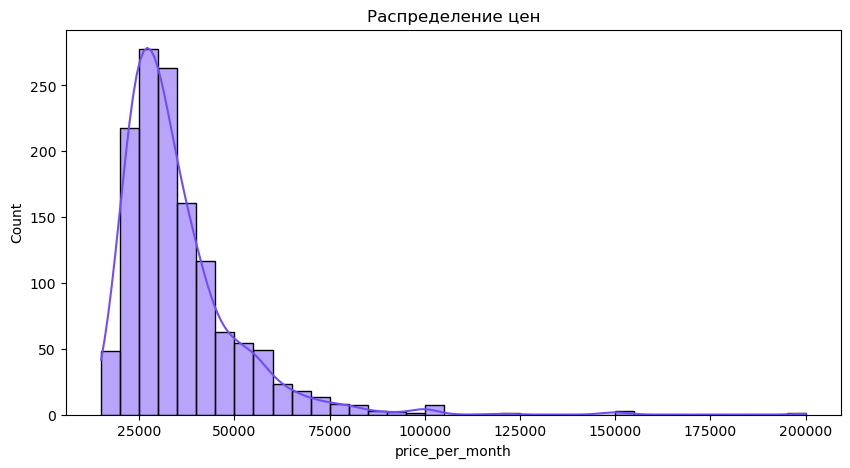

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'price_per_month',color = (114/255, 76/255, 249/255),data = ds,binwidth=5000,kde=True)
plt.title('Распределение цен')
plt.show()

надо еще раз убрать выбросы, так как в прошлый раз удалили только 1 очень большой

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


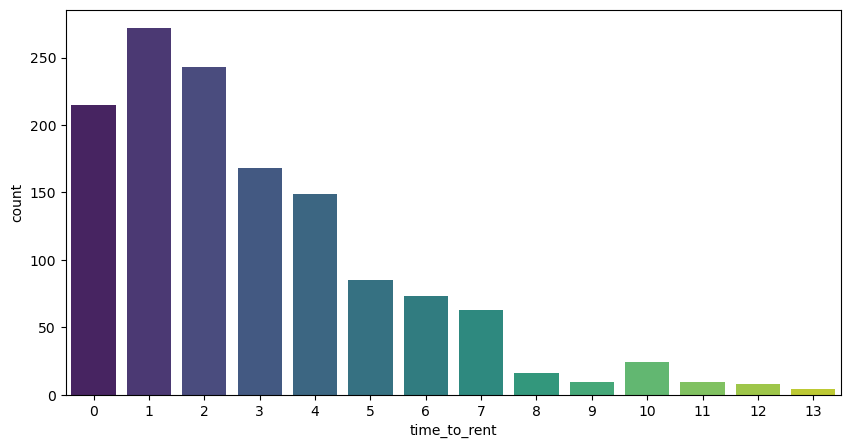

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'time_to_rent',palette='viridis',data = ds)
plt.show()

тут тоже надо удалить выбросы еще раз. Еще распределение смещено влево, потому что не достаточно долго собирались данные

In [58]:
ds = ds.drop(ds[np.abs(stats.zscore(ds['price_per_month']))>3].index)
ds = ds.drop(ds[np.abs(stats.zscore(ds['time_to_rent']))>3].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


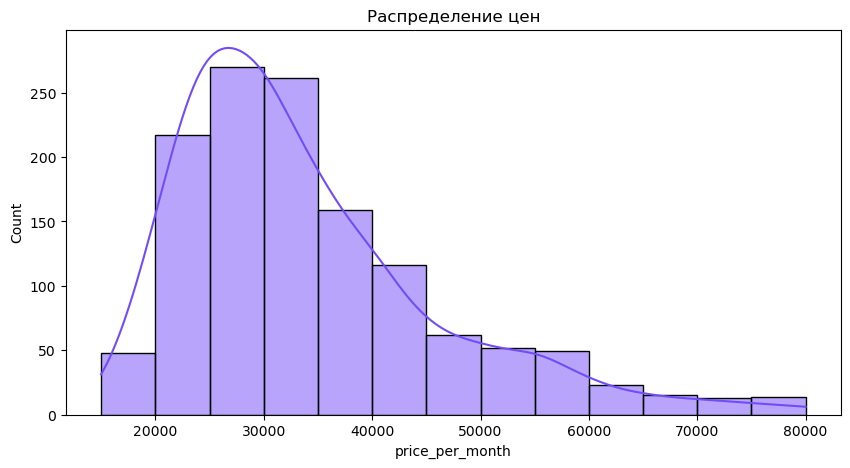

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'price_per_month',color = (114/255, 76/255, 249/255),data = ds,binwidth=5000,kde=True)
plt.title('Распределение цен')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


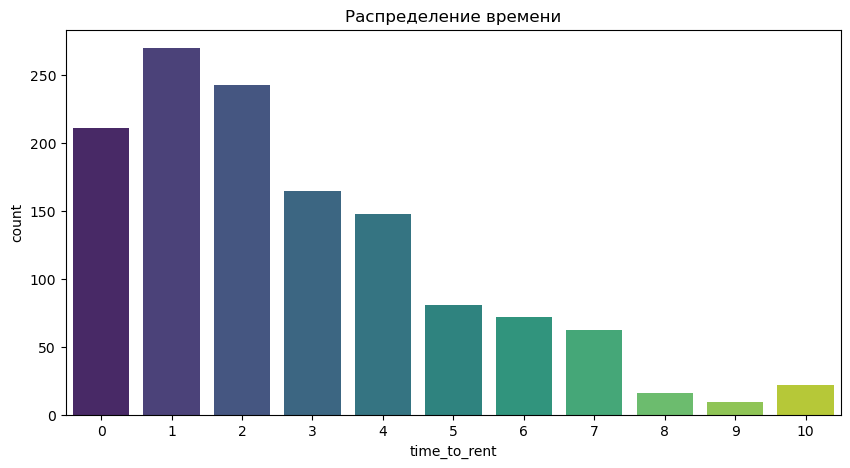

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'time_to_rent',palette='viridis',data = ds)
plt.title('Распределение времени')
plt.show()

Ну пока данных мало - пойдет

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


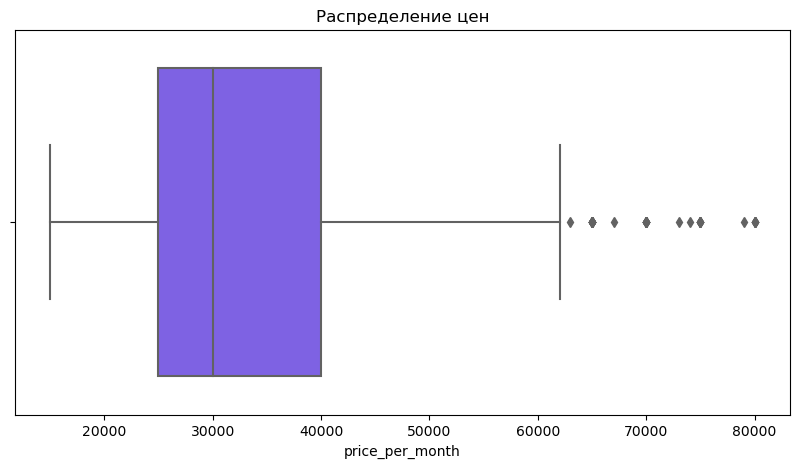

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'price_per_month',color = (114/255, 76/255, 249/255),data = ds)
plt.title('Распределение цен')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


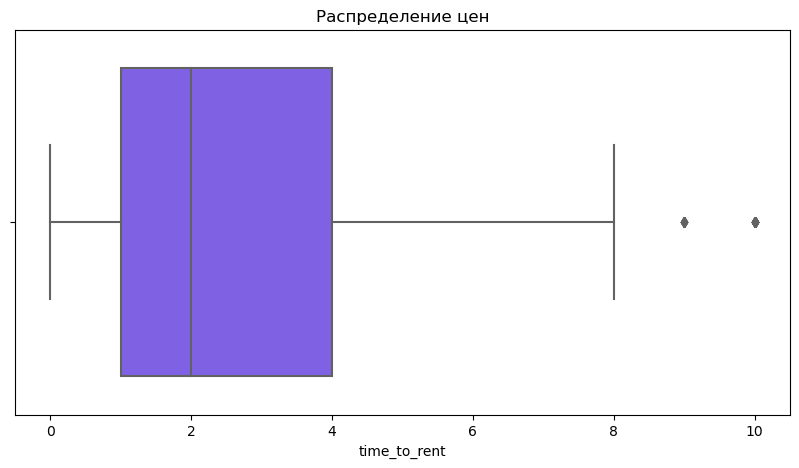

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'time_to_rent',color = (114/255, 76/255, 249/255),data = ds)
plt.title('Распределение цен')
plt.show()

Посмотрим на метро и районы

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


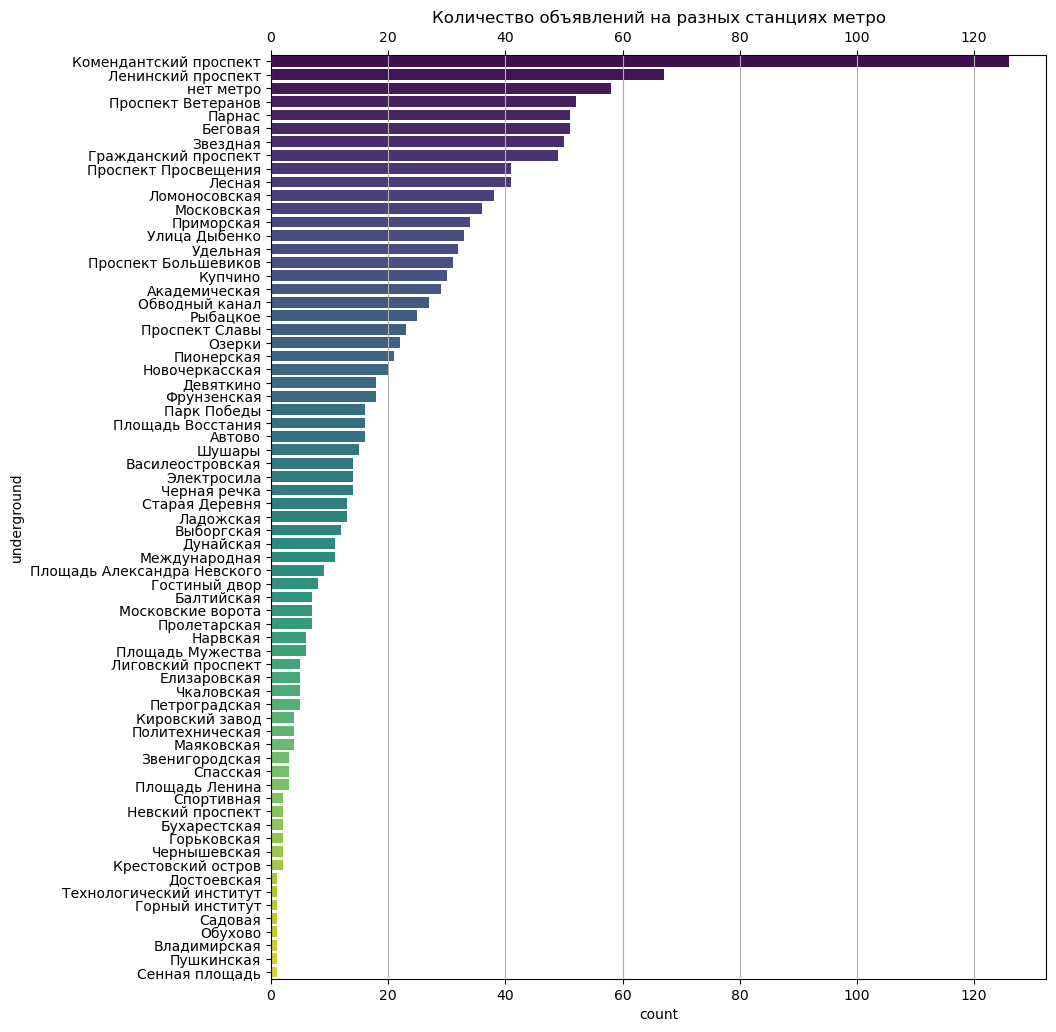

In [63]:
plt.figure(figsize=(10,12))
sns.countplot(y = 'underground',palette='viridis',data = ds,order = ds['underground'].value_counts().index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Количество объявлений на разных станциях метро')
plt.show()

In [64]:
und = ds['underground'].value_counts() < 5
und_to_del = list(und[und == True].index)
und_to_del

['Кировский завод',
 'Политехническая',
 'Маяковская',
 'Звенигородская',
 'Спасская',
 'Площадь Ленина',
 'Спортивная',
 'Невский проспект',
 'Бухарестская',
 'Горьковская',
 'Чернышевская',
 'Крестовский остров',
 'Достоевская',
 'Технологический институт',
 'Горный институт',
 'Садовая',
 'Обухово',
 'Владимирская',
 'Пушкинская',
 'Сенная площадь']

In [65]:
ds = ds.drop(ds[ds['underground'].isin(und_to_del)].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


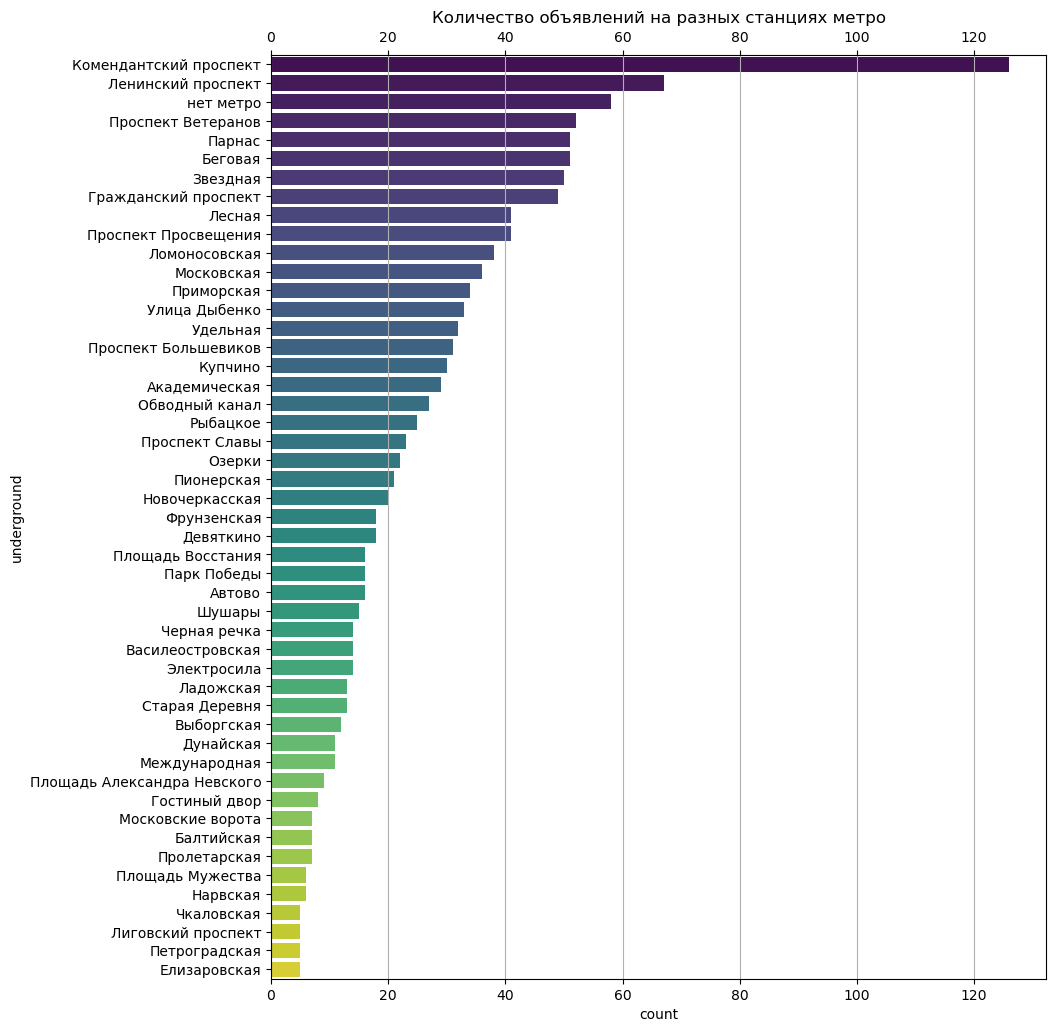

In [66]:
plt.figure(figsize=(10,12))
sns.countplot(y = 'underground',palette='viridis',data = ds,order = ds['underground'].value_counts().index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Количество объявлений на разных станциях метро')
plt.show()

In [67]:
metro_grouped = ds.groupby('underground').agg({'price_per_month':'mean','time_to_rent':'mean'})
metro_grouped.index.name = None
metro_grouped

,price_per_month,time_to_rent
Автово,23875.000000,2.187500
Академическая,27551.724138,2.034483
Балтийская,44571.428571,3.857143
Беговая,34107.843137,2.941176
Василеостровская,50142.857143,3.714286
Выборгская,32166.666667,4.083333
Гостиный двор,60000.000000,4.625000
Гражданский проспект,26365.306122,2.469388
Девяткино,22350.000000,2.611111
Дунайская,39545.454545,3.454545


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


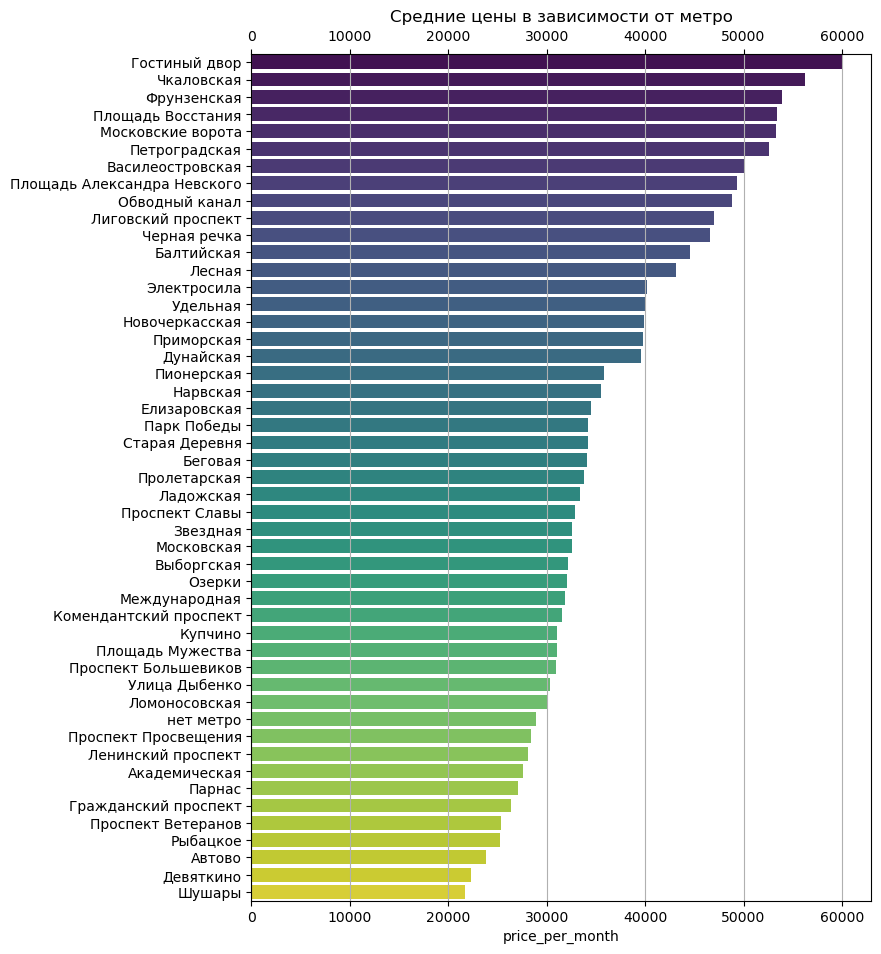

In [68]:
plt.figure(figsize=(8,11))
sns.barplot(data = metro_grouped,x = 'price_per_month', y =metro_grouped.index , palette='viridis', order = metro_grouped.sort_values(by='price_per_month',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Средние цены в зависимости от метро')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


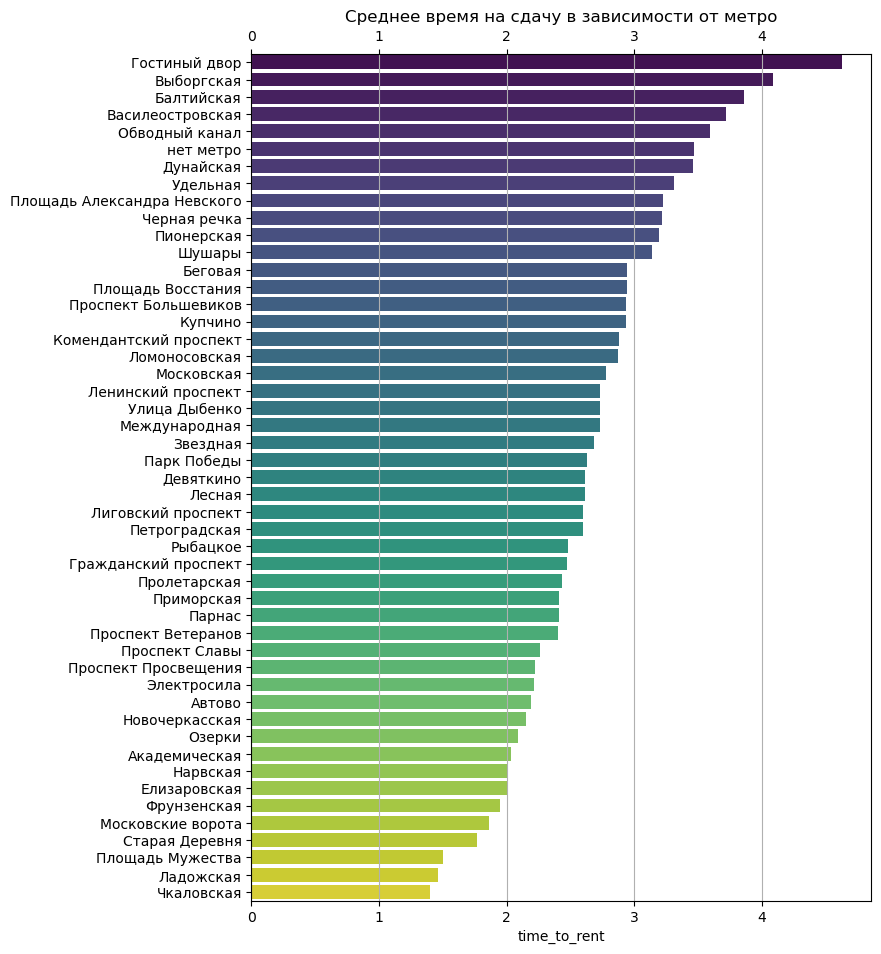

In [69]:
plt.figure(figsize=(8,11))
sns.barplot(data = metro_grouped,x = 'time_to_rent', y =metro_grouped.index , palette='viridis',order = metro_grouped.sort_values(by='time_to_rent',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Среднее время на сдачу в зависимости от метро')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


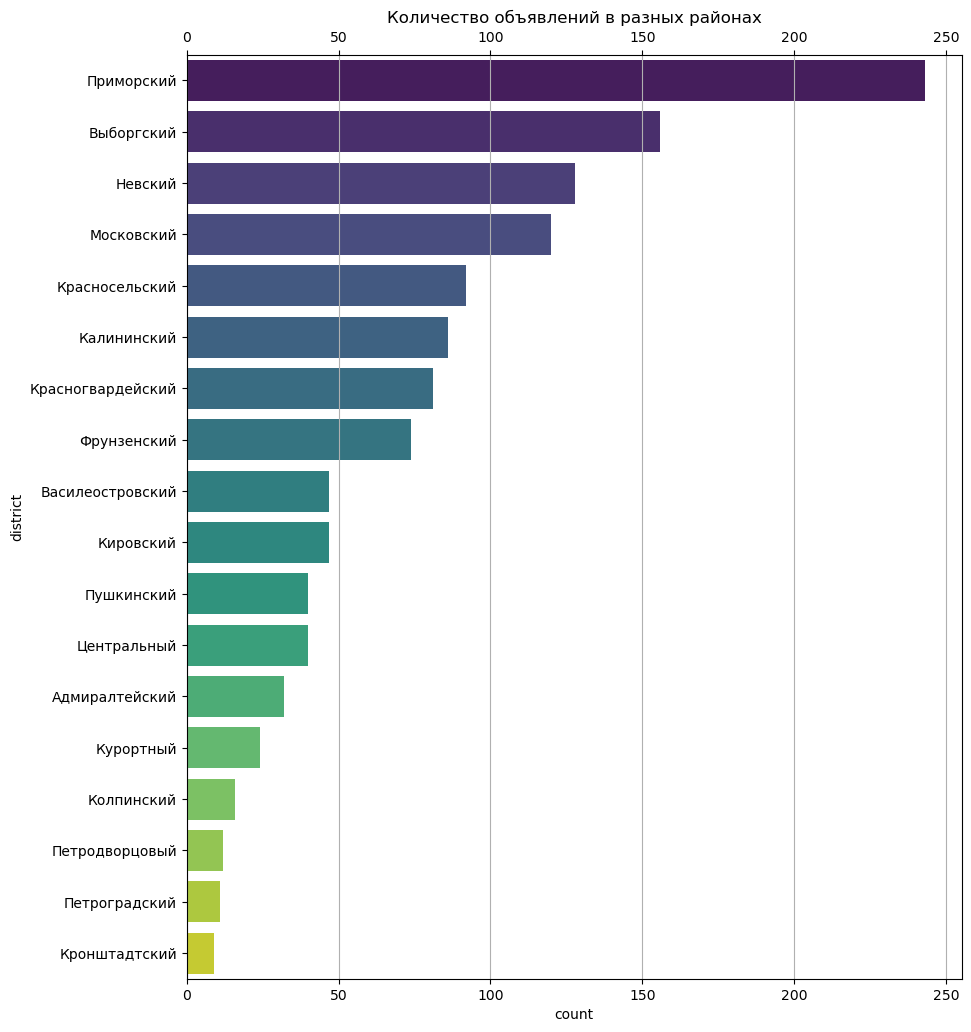

In [70]:
plt.figure(figsize=(10,12))
sns.countplot(y = 'district',palette='viridis',data = ds,order = ds['district'].value_counts().index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Количество объявлений в разных районах')
plt.show()

In [71]:
district_grouped = ds.groupby('district').agg({'price_per_month':'mean','time_to_rent':'mean'})
district_grouped.index.name = None
district_grouped

,price_per_month,time_to_rent
Адмиралтейский,51187.500000,2.406250
Василеостровский,41978.723404,2.765957
Выборгский,32252.564103,2.371795
Калининский,29074.418605,2.569767
Кировский,27308.510638,2.106383
Колпинский,21375.000000,3.812500
Красногвардейский,28740.740741,2.333333
Красносельский,26676.086957,2.826087
Кронштадтский,25000.000000,3.000000
Курортный,36916.666667,3.958333


c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


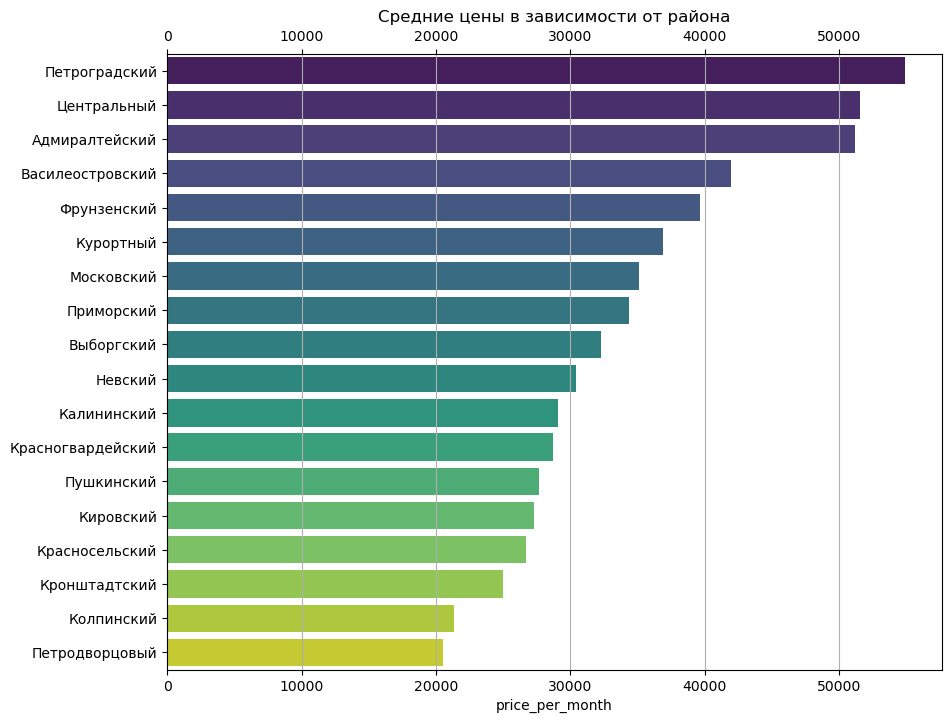

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(data = district_grouped,x = 'price_per_month', y =district_grouped.index , palette='viridis', order = district_grouped.sort_values(by='price_per_month',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Средние цены в зависимости от района')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


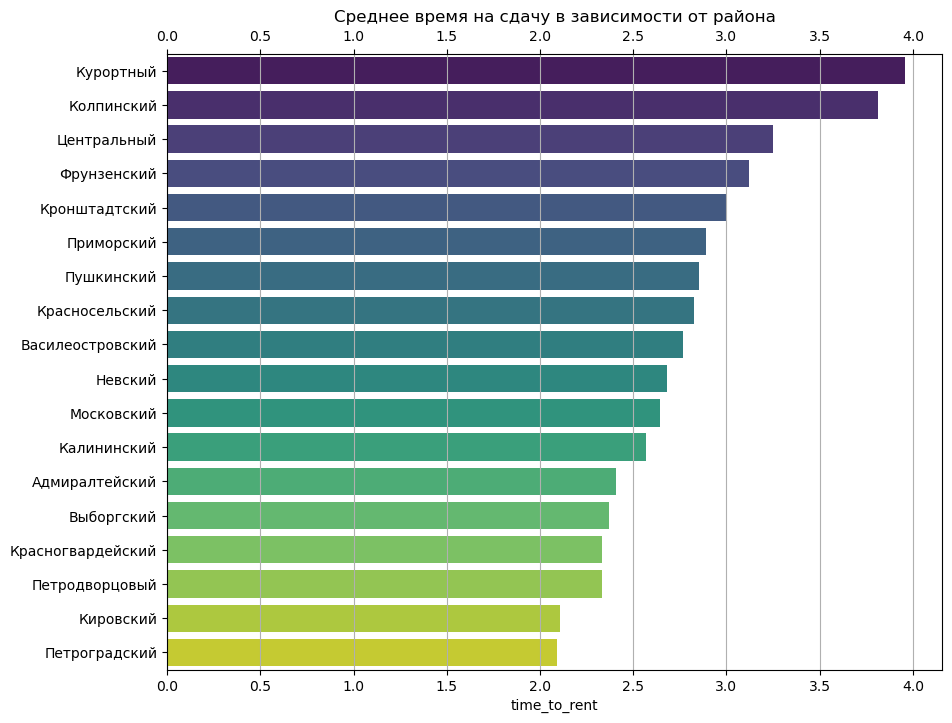

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(data = district_grouped,x = 'time_to_rent', y =district_grouped.index , palette='viridis', order = district_grouped.sort_values(by='time_to_rent',ascending=False).index)
plt.tick_params(axis= 'x',top=True,bottom = True,labelbottom=True, labeltop=True)
plt.grid(axis= 'x')
plt.title('Среднее время на сдачу в зависимости от района')
plt.show()

---

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


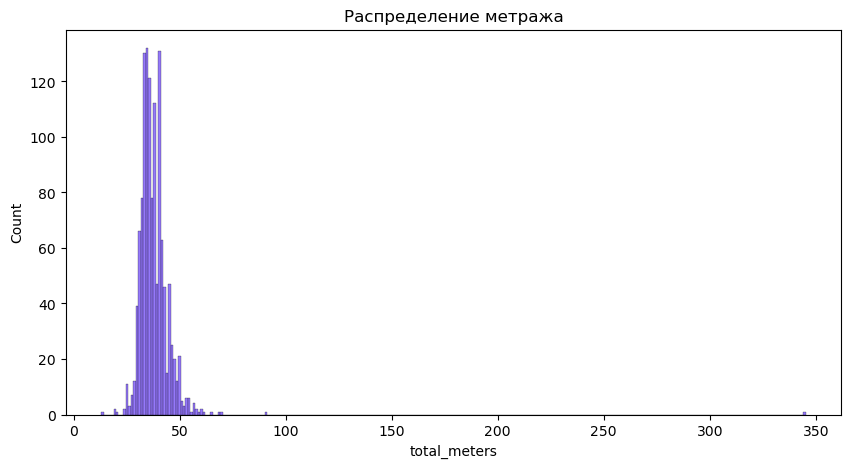

In [74]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'total_meters',color = (114/255, 76/255, 249/255),data = ds)
plt.title('Распределение метража')
plt.show()

In [75]:
ds = ds.drop(ds[np.abs(stats.zscore(ds['total_meters']))>3].index)

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


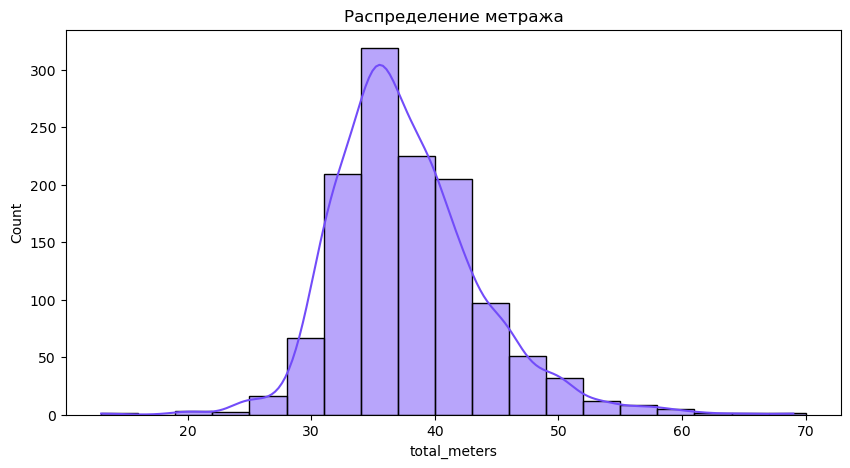

In [76]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'total_meters',color = (114/255, 76/255, 249/255),data = ds,binwidth=3,kde=True)
plt.title('Распределение метража')
plt.show()

---

In [77]:
ds.columns

Index(['floor', 'floors_count', 'total_meters', 'price_per_month', 'district',
       'underground', 'Холодильник', 'Стиральная машина', 'Телевизор',
       'Посудомоечная машина', 'Кондиционер', 'Интернет', 'Площадь кухни',
       'Высота потолков', 'Санузел', 'Балкон/лоджия', 'Вид из окон', 'Ремонт',
       'Год постройки', 'Тип дома', 'Парковка', 'time_to_rent'],
      dtype='object')

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

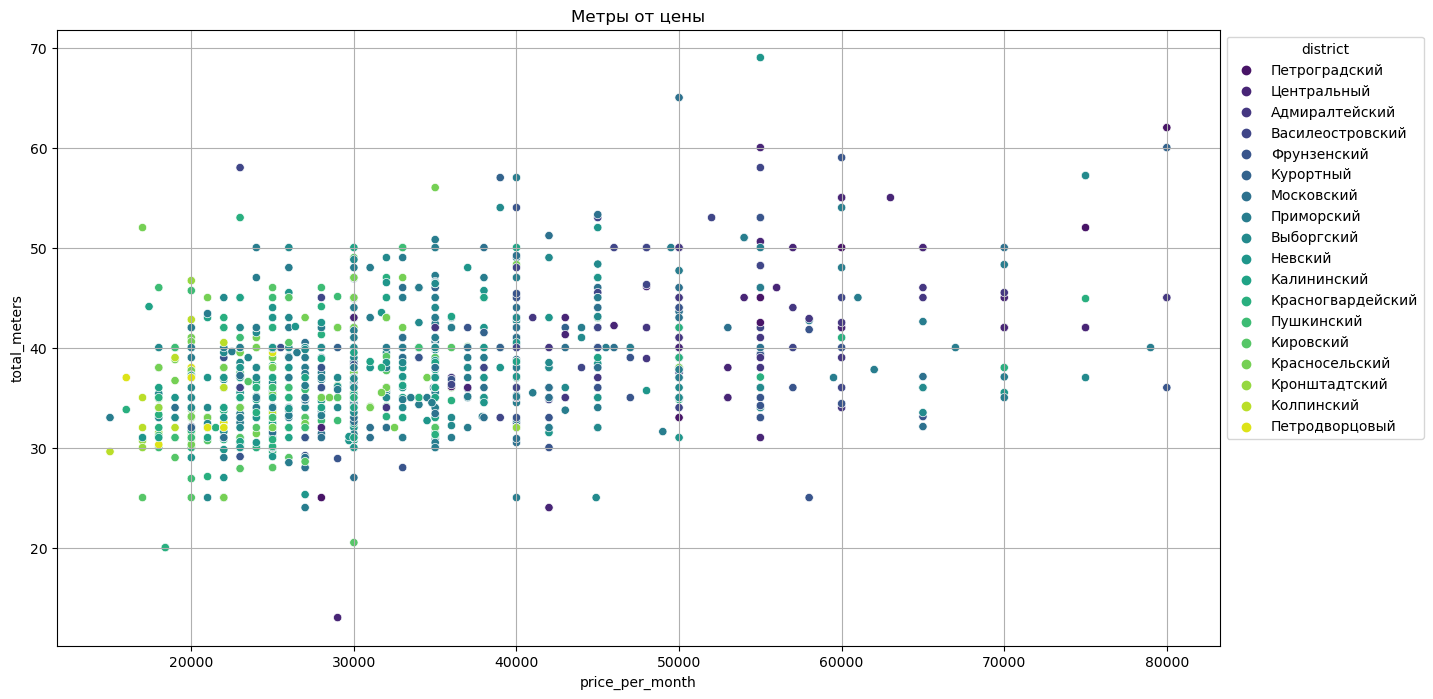

In [78]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data = ds,x = 'price_per_month', y ='total_meters',palette='viridis',hue = 'district',hue_order = district_grouped.sort_values(by='price_per_month',ascending=False).index)
sns.move_legend(ax,'upper left',bbox_to_anchor=(1, 1))
plt.grid()
plt.title('Метры от цены')
plt.show()

c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ntsec\anaconda3\envs\new_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


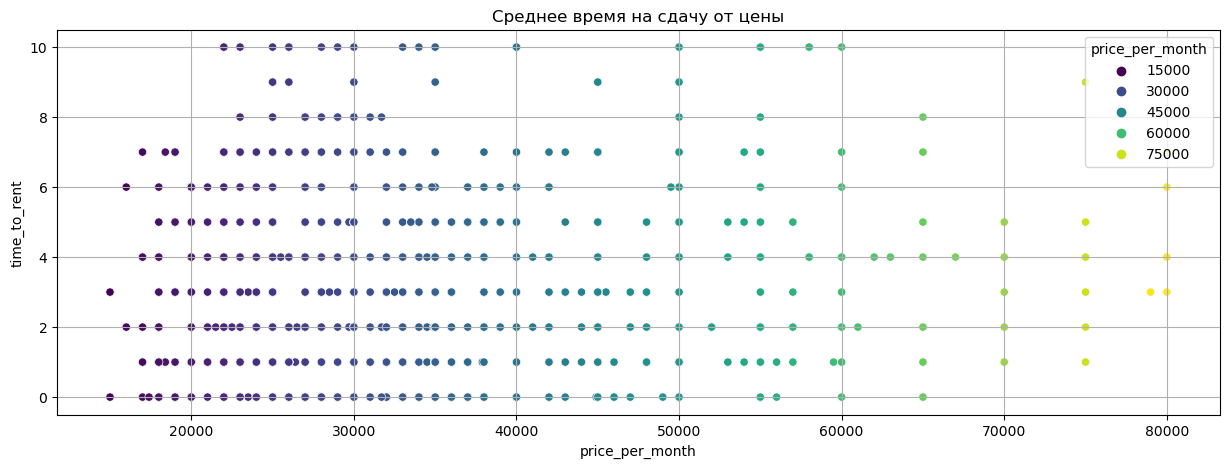

In [79]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = ds,x = 'price_per_month', y ='time_to_rent' , palette='viridis',hue = 'price_per_month')
plt.grid()
plt.title('Среднее время на сдачу от цены')
plt.show()

In [106]:
ds.to_csv('r_1_SPB_clear.csv')

---